In [27]:
#!pip install numpy --upgrade --user

In [24]:
#!C:\Users\user\Anaconda2\python.exe -m pip install --upgrade pip

  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


distributed 1.21.8 requires msgpack, which is not installed.
grin 1.2.1 requires argparse>=1.1, which is not installed.


In [35]:
#!conda config --append channels conda-forge

In [ ]:
#unfortunately tensorflow unavilable for current Python 2.x need to upgrade to Python 3.x
!conda install tensorflow

In [38]:
#!easy_install fancyimpute 

Searching for fancyimpute
Reading https://pypi.org/simple/fancyimpute/
Best match: fancyimpute 0.4.0
Processing fancyimpute-0.4.0.tar.gz
Writing c:\users\user\appdata\local\temp\easy_install-ex3g8f\fancyimpute-0.4.0\setup.cfg
Running fancyimpute-0.4.0\setup.py -q bdist_egg --dist-dir c:\users\user\appdata\local\temp\easy_install-ex3g8f\fancyimpute-0.4.0\egg-dist-tmp-kllvmf
Moving fancyimpute-0.4.0-py2.7.egg to c:\users\user\anaconda2\lib\site-packages
Adding fancyimpute 0.4.0 to easy-install.pth file

Installed c:\users\user\anaconda2\lib\site-packages\fancyimpute-0.4.0-py2.7.egg
Processing dependencies for fancyimpute
Searching for tensorflow
Reading https://pypi.org/simple/tensorflow/


zip_safe flag not set; analyzing archive contents...
No local packages or working download links found for tensorflow
error: Could not find suitable distribution for Requirement.parse('tensorflow')


In [2]:
import struct;print(struct.calcsize("P") * 8)

64


In [2]:
#!pip install fancyimpute

  Using cached https://files.pythonhosted.org/packages/24/8a/79952041086f139612966ee020f8dc50595fe1a93644d428dbc84852b902/fancyimpute-0.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2d/3b/e9cf628bcb129731aefd9237e49ac455d14e3724c5d01f8d4df6acae75d0/cvxpy-1.0.9.tar.gz
  Using cached https://files.pythonhosted.org/packages/f2/6c/22469923361a70b62e5b14c96f0d2b0e386dce9d7f567187a02f26a7cb40/np_utils-0.5.5.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/e8/35/e9ab006430d36aed71f623db8d194a723a14d40b52b3405cdd5b94d9de04/knnimpute-0.1.0.tar.gz
  Running setup.py bdist_wheel for cvxpy: started
  Running setup.py bdist_wheel for cvxpy: finished with status 'error'
  Complete output from command c:\users\gwhit\appdata\local\continuum\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__=

  Failed building wheel for cvxpy
  Failed building wheel for ecos
Command "c:\users\gwhit\appdata\local\continuum\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\gwhit\\AppData\\Local\\Temp\\pip-install-v46aaasr\\ecos\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\gwhit\AppData\Local\Temp\pip-record-os3rwwl5\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\gwhit\AppData\Local\Temp\pip-install-v46aaasr\ecos\


In [1]:
#!pip install tensorflow

  Could not find a version that satisfies the requirement tensorflow (from versions: )
No matching distribution found for tensorflow
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Problem #2 Mitochondrial SNP/Mutations Patterns

In [4]:
#!pip install missingpy

In [73]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from missingpy import KNNImputer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GMM
from sklearn.cluster import AgglomerativeClustering
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from scipy.cluster.hierarchy import dendrogram, linkage

In [53]:
mitochondria = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Mt1t.mutate.csv")

In [54]:
mitochondria.head()

,Group,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
0,Position_site,3.0,10,16,18,26,35,40,41,47,...,16482,16483,16497,16509,16512,16524,16525,16526,16527,16537.0
1,CNSS,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,RSRS,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,H,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,T,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [55]:
mitochondria.shape

(1077, 2712)

# Preprocessing

There are a lot of NaN's in this dataset so we need to deal with them before we can do any cluster analysis.Part of being a good data scientist is adjusting your methods to the data. in order to deal with these missing values I'm going to call on  "Dealing with missing values in large-scale studies: microarray data imputation and beyond" to determine how to proceed. Article can be viewed at https://academic.oup.com/bib/article/11/2/253/216449

In [56]:
Y_mitochondria = mitochondria[u'Group']
X_mitochondria = mitochondria.drop(u'Group', axis=1)

In [57]:
X_mitochondria.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
0,3.0,10,16,18,26,35,40,41,47,57,...,16482,16483,16497,16509,16512,16524,16525,16526,16527,16537.0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [58]:
X_mitochondria.isna().sum().sum() #determines total number of missing values

601

In [51]:
#?KNNImputer

In [59]:
#Uses KNN as imputation method
imputer = KNNImputer(n_neighbors=1)
X_imputed = imputer.fit_transform(X_mitochondria)
X_imputed = pd.DataFrame(X_imputed) #transforms X_imputed from array to pandas dataframe
X_imputed.columns = X_mitochondria.columns  #sets column index appropriately 

In [60]:
X_imputed.shape

(1077, 2711)

In [61]:
X_imputed.isna().sum().sum() #determines total number of missing values after imputation

0

In [62]:
X_mitochondria = X_imputed #renames our imputed dataset

In [63]:
X_mitochondria = X_mitochondria.drop([0,1,2]) #drops unnessesarry 

In [64]:
X_mitochondria.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
apriori(X_mitochondria, min_support=0.25, use_colnames=True)

,support,itemsets
0,0.270019,(X33)
1,0.403166,(X1278)
2,0.406890,(X1447)
3,0.480447,(X1586)
4,0.406890,(X1647)
5,0.465549,(X1919)
6,0.344507,(X2384)
7,0.469274,(X2605)
8,0.402235,"(X1278, X1447)"
9,0.398510,"(X1586, X1278)"


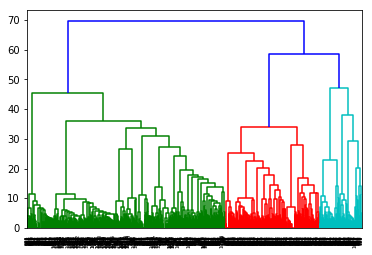

In [74]:
Z = linkage(X_mitochondria, 'ward')
dn = dendrogram(Z)

In [77]:
?linkage

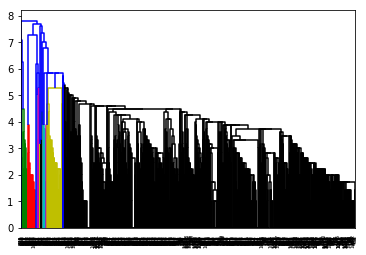

In [76]:
Z = linkage(X_mitochondria, 'single')
dn = dendrogram(Z)

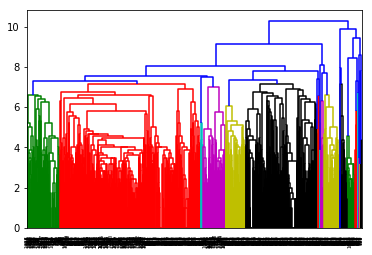

In [78]:
Z = linkage(X_mitochondria, 'complete')
dn = dendrogram(Z)

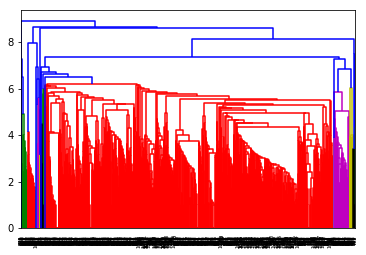

In [79]:
Z = linkage(X_mitochondria, 'average')
dn = dendrogram(Z)

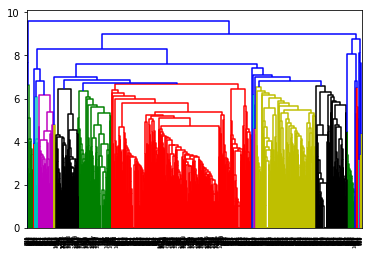

In [80]:
Z = linkage(X_mitochondria, 'weighted')
dn = dendrogram(Z)

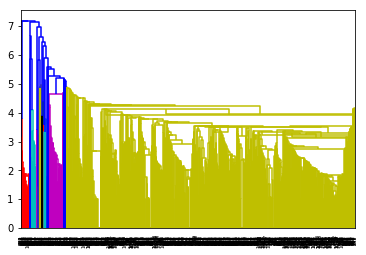

In [81]:
Z = linkage(X_mitochondria, 'centroid')
dn = dendrogram(Z)

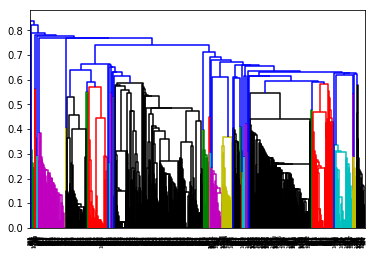

In [87]:
Z = linkage(X_mitochondria, 'single',metric="cosine")
dn = dendrogram(Z)

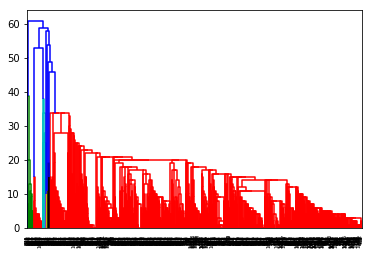

In [88]:
Z = linkage(X_mitochondria, 'single',metric="cityblock")
dn = dendrogram(Z)

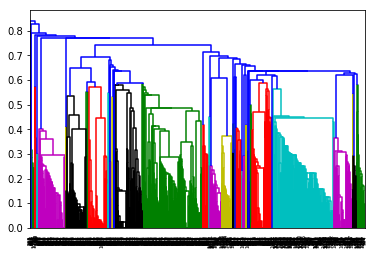

In [89]:
Z = linkage(X_mitochondria, 'single', metric ="braycurtis")
dn = dendrogram(Z)

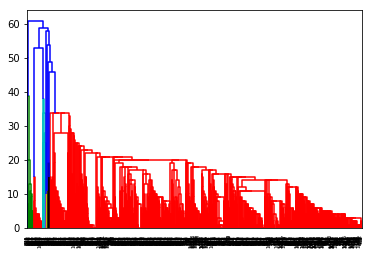

In [90]:
Z = linkage(X_mitochondria, 'single', metric ="canberra")
dn = dendrogram(Z)

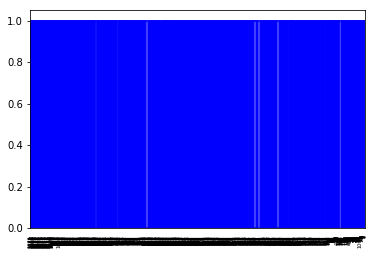

In [91]:
Z = linkage(X_mitochondria, 'single', metric ="chebyshev")
dn = dendrogram(Z)

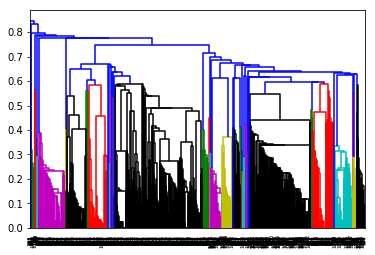

In [92]:
Z = linkage(X_mitochondria, 'single', metric ="correlation")
dn = dendrogram(Z)

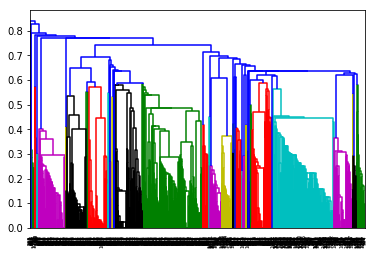

In [93]:
Z = linkage(X_mitochondria, 'single', metric ="dice")
dn = dendrogram(Z)

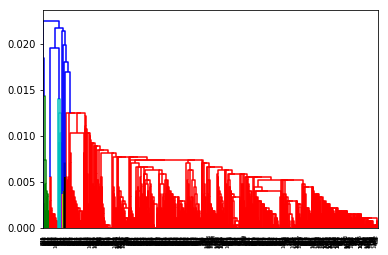

In [94]:
Z = linkage(X_mitochondria, 'single', metric ="hamming")
dn = dendrogram(Z)

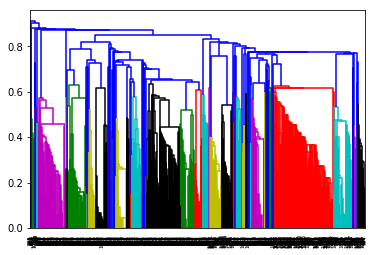

In [95]:
Z = linkage(X_mitochondria, 'single', metric ="jaccard")
dn = dendrogram(Z)

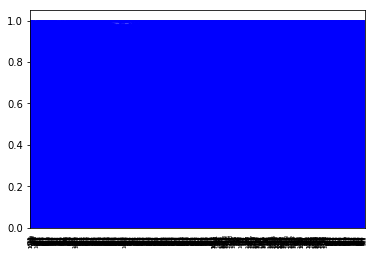

In [96]:
Z = linkage(X_mitochondria, 'single', metric ="kulsinski")
dn = dendrogram(Z)

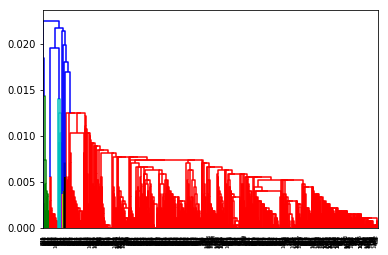

In [98]:
Z = linkage(X_mitochondria, 'single', metric ="matching")
dn = dendrogram(Z)

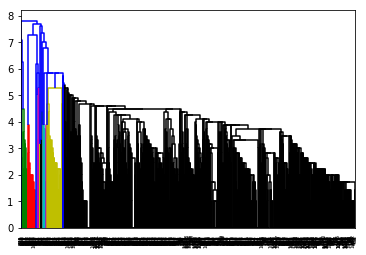

In [99]:
Z = linkage(X_mitochondria, 'single', metric ="minkowski")
dn = dendrogram(Z)

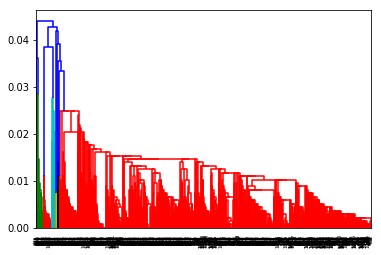

In [100]:
Z = linkage(X_mitochondria, 'single', metric ="russellrao")
dn = dendrogram(Z)

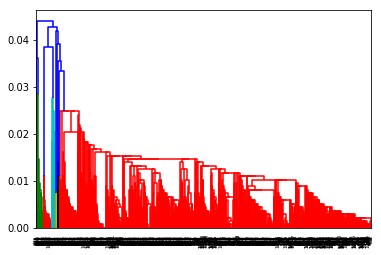

In [102]:
Z = linkage(X_mitochondria, 'single', metric ="sokalmichener")
dn = dendrogram(Z)

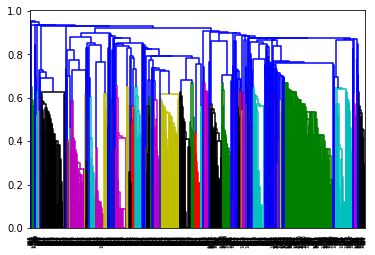

In [103]:
Z = linkage(X_mitochondria, 'single', metric ="sokalsneath")
dn = dendrogram(Z)

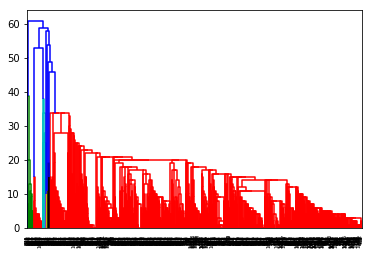

In [104]:
Z = linkage(X_mitochondria, 'single', metric ="sqeuclidean")
dn = dendrogram(Z)

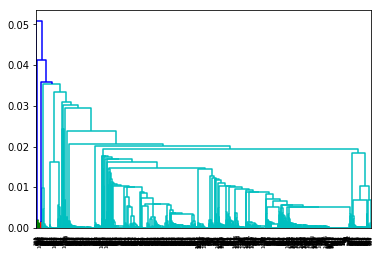

In [106]:
Z = linkage(X_mitochondria, 'single', metric ="yule")
dn = dendrogram(Z)

In [82]:
?pdist

Object `pdist` not found.


# Clustering

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_mitochondria, Y_mitochondria,
                                                random_state=9)
Xcolnames = list(X_mitochondria)

In [13]:
scaler = StandardScaler()
scaler.fit(X_mitochondria)
X_scaled = scaler.transform(X_mitochondria)

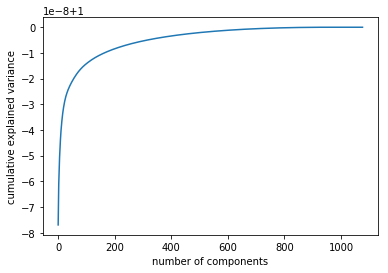

In [14]:
pca = PCA().fit(X_mitochondria)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [15]:
# keep the first 200 principal components of the data
pca = PCA(n_components=200)
# fit PCA model
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (1077, 2711)
Reduced shape: (1077, 200)


C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Loca

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Loca

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\gwhit\AppData\Local\Conti

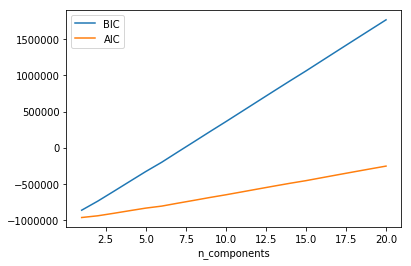

In [17]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_pca)
          for n in n_components]

plt.plot(n_components, [m.bic(X_pca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');